In [186]:
import numpy as np
import matplotlib.pyplot as plt

# PLA = w1x1 + w2x2 + b

In [187]:
train = np.array([(1, 0, 1), (1, 3, -1), (2, -6, 1),
                 (-1, -3, 1), (-5, 5, -1), (5, 2, 1),
                 (-2, 2, -1), (-7, 2, -1), (4, -4, 1),
                 (-5, -1, -1)], dtype = int)

test = np.array([(2, -4, 0), (-5, 1, 0), (-2, -2, 0)], dtype = int)

In [188]:
# Weights and Bias
# My student number
w1 = 0.407
w2 = 0.262
b = 0.316

In [189]:
def sign(A):
    if A > 0:
        return 1
    elif A < 0:
        return -1
    else:
        return 0

In [190]:
epoch = 0
correct = 0
warning = 1000

# Learning rate 0 < LA < 1
LA = 0.1

# Check data good or bad, all good is done!
while correct != 10 and epoch != warning:
    correct = 0
    epoch += 1
    for i in train:
        LA = LA + 1 / (correct + 0.99)
        if sign( w1 * i[0] + w2 * i[1] + b ) != i[2]:
            w1 = w1 + LA * i[2] * i[0]
            w2 = w2 + LA * i[2] * i[1]
            b = b + LA * i[2]
            print(w1, w2, b)
        else:
            correct += 1

print("\n==== ==== ==== ====\n")
print("total epoch = {}".format(epoch))
print("weight-1 = {}".format(w1))
print("weight-2 = {}".format(w2))
print("bias = {}".format(b))
print("The line is {} * x1 + {} * x2 + {} = 0".format(w1, w2, b))

-1.2056135729150805 -4.575840718745242 -1.2966135729150805
13.297394748502487 1.2253626098217847 1.603988091368433
8.248615839511366 -13.920974117151578 -3.444790817622688

==== ==== ==== ====

total epoch = 3
weight-1 = 8.248615839511366
weight-2 = -13.920974117151578
bias = -3.444790817622688
The line is 8.248615839511366 * x1 + -13.920974117151578 * x2 + -3.444790817622688 = 0


In [191]:
cnt = 0

# Check test data
for i in test:
    cnt += 1
    val = sign( w1 * i[0] + w2 * i[1] + b )
    i[2] = val
    print('test-{} value = {}'.format(cnt, val))

test-1 value = 1
test-2 value = -1
test-3 value = 1


In [192]:
def line(x):
    return ( w1 * x + b ) / (-w2)

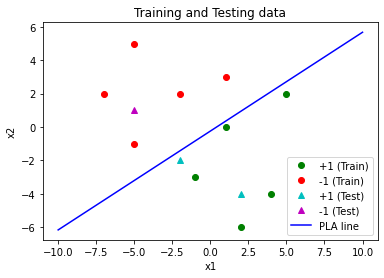

In [193]:
plt.title("Training and Testing data")
plt.xlabel("x1")
plt.ylabel("x2")

g1 = []
g2 = []
r1 = []
r2 = []
c1 = []
c2 = []
m1 = []
m2 = []

# Show the relation of data and line
# Grouping with class values
for i in train:
    if i[2] > 0:
        g1.append(i[0])
        g2.append(i[1])
    elif i[2] < 0:
        r1.append(i[0])
        r2.append(i[1])
    else:
        plt.plot(i[0], i[1], 'xk', label='ambiguity (Train)')

for i in test:
    if i[2] > 0:
        c1.append(i[0])
        c2.append(i[1])
    elif i[2] < 0:
        m1.append(i[0])
        m2.append(i[1])
    else:
        plt.plot(i[0], i[1], '^c', label='ambiguity (Test)')
        
        
plt.plot(g1, g2, 'og', label='+1 (Train)')
plt.plot(r1, r2, 'or', label='-1 (Train)')

plt.plot(c1, c2, '^c', label='+1 (Test)')
plt.plot(m1, m2, '^m', label='-1 (Test)')
        
# Put points from -10 to 10
space = np.linspace(-10, 10, 50)
plt.plot(space, line(space), '-b', label='PLA line')

plt.legend()